In [1]:
#Carga de las librerías
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Descargamos los datos desde internet!
file_name = 'dataR2.csv'

def download_file(file_name):
    print('Descargando el dataset')
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv'
    urllib.request.urlretrieve(url, file_name)

download_file(file_name)

Descargando el dataset


In [5]:
#Ahora si cargamos los datos en jupyter!
data = pd.read_csv(file_name)
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [6]:
data.shape

(116, 10)

In [7]:
data.Classification.unique()

array([1, 2], dtype=int64)

In [8]:
data.Classification.value_counts()

Classification
2    64
1    52
Name: count, dtype: int64

**Insights**:

* El dataset se compone de 10 columnas de las cuales 9 corresponden a variables independientes, que usaremos para predecir el target. 

* Classification es la variable a predecir. Todas las variables son numéricas, ya sea enteras o reales y no tiene valores nulos.

In [9]:
#Separamos en X e y
X = data.drop(["Classification"], axis=1)
y = data["Classification"]

In [10]:
X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [11]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer
pw=PowerTransformer(method='yeo-johnson')
X_new=pw.fit_transform(X)

In [12]:
X_new

array([[-0.5573594 , -0.79658153, -2.23041978, ...,  0.24531273,
        -0.4856095 , -0.14204333],
       [ 1.55920165, -1.44625164, -0.08344513, ..., -0.73195651,
        -1.59939477,  0.03443475],
       [ 1.50160346, -0.88027362, -0.15198205, ...,  1.59059786,
        -0.25297792,  0.29753062],
       ...,
       [ 0.4991548 ,  0.90686309,  0.23143661, ...,  1.5979668 ,
        -0.08821165, -0.55091747],
       [ 0.91756633, -0.34613146, -0.87116453, ...,  2.20164599,
        -1.96740634, -0.23217138],
       [ 1.73117629, -0.01964869,  1.75065162, ...,  0.85976831,
        -1.48470019, -2.05232127]])

<Axes: ylabel='Count'>

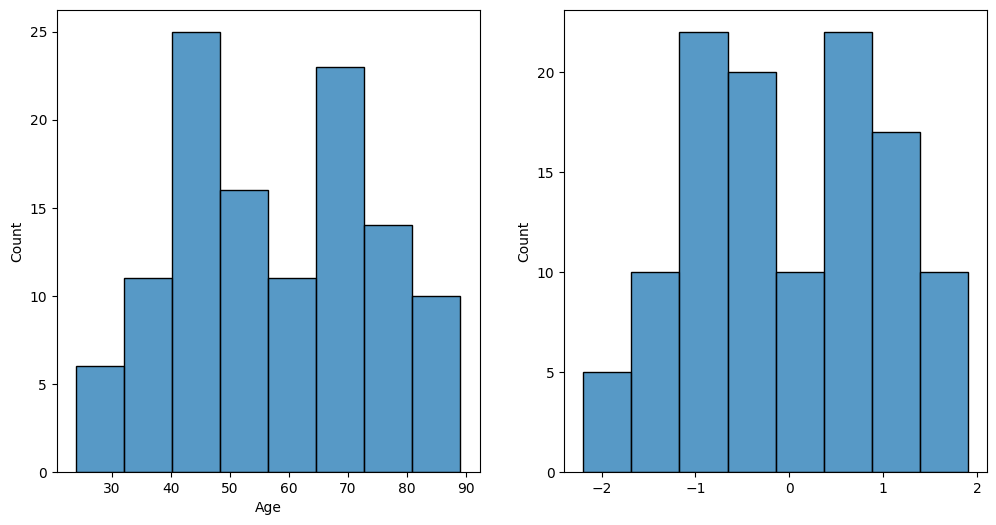

In [13]:
# Verificar distribucion
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.histplot(data.Age)
plt.subplot(122)
sns.histplot(X_new[:,0])

<Axes: ylabel='Count'>

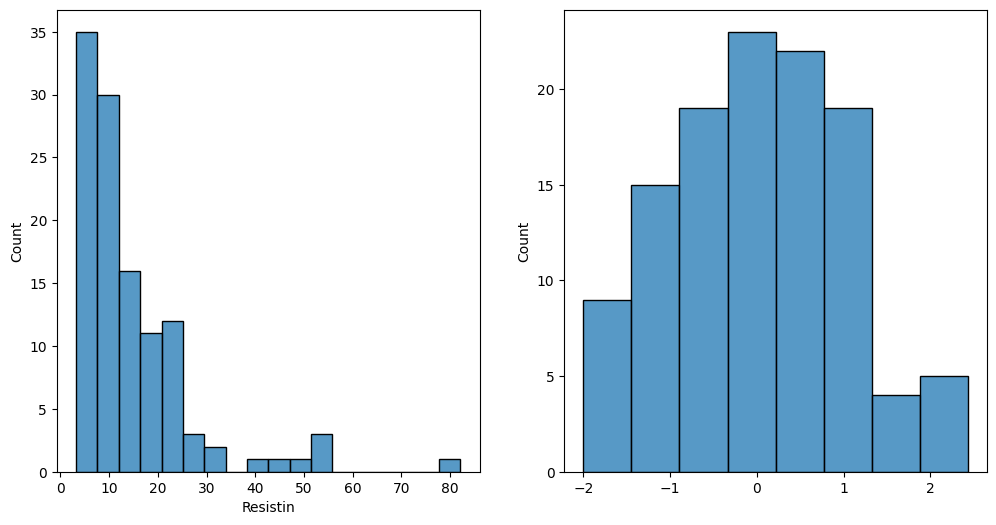

In [14]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.histplot(data.Resistin)
plt.subplot(122)
sns.histplot(X_new[:,-2])

In [15]:
#Separamos en train y test!
(X_train, X_test,y_train, y_test) = train_test_split(X_new,y,stratify=y,test_size=0.30,random_state=42)

In [16]:
#Creamos un arbol de decisión sencillo y lo fiteamos
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
y_test_pred = tree.predict(X_test) #Prediccion en Test

A lo largo de este notebook, se solicita calcular las métricas requeridas como así también su correspondiente interpretación: 

1. Calcular la métrica Accuracy.

In [18]:
###Completar
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.7714285714285715

2. Crear la Matriz de Confusión

In [19]:
###Completar
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred) 

array([[13,  3],
       [ 5, 14]], dtype=int64)

3. Calcular la métrica Recall

In [20]:
###Completar
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred) 

0.7222222222222222

4.Calcular la métrica F1 score

In [21]:
###Completar
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred) 

0.8125

In [22]:
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred) 

0.7647058823529411

In [23]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.72      0.81      0.76        16
           2       0.82      0.74      0.78        19

    accuracy                           0.77        35
   macro avg       0.77      0.77      0.77        35
weighted avg       0.78      0.77      0.77        35



# Random Forest

In [24]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

For a comparison between tree-based ensemble models see the example
:ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_co

In [25]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=42, n_estimators=50,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=50, random_state=42)

In [26]:
y_test_pred = model.predict(X_test) #Prediccion en Test

1. Calcular la métrica Accuracy.

In [27]:
###Completar
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.8

2. Calcular la métrica Precision

In [28]:
###Completar
from sklearn.metrics import precision_score
precision_score(y_test, y_test_pred) 

0.7368421052631579

3. Calcular la métrica Recall

In [29]:
###Completar
from sklearn.metrics import recall_score
recall_score(y_test, y_test_pred) 

0.875

4. Calcular la métrica F1 score

In [30]:
###Completar
from sklearn.metrics import f1_score
f1_score(y_test, y_test_pred) 

0.7999999999999999

In [31]:
from sklearn.metrics import classification_report 
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           1       0.74      0.88      0.80        16
           2       0.88      0.74      0.80        19

    accuracy                           0.80        35
   macro avg       0.81      0.81      0.80        35
weighted avg       0.81      0.80      0.80        35



# Actividad

In [32]:
url='https://raw.githubusercontent.com/dfbustosus/Tutorial-airflow/main/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(url,sep=',')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [34]:
columns=['gender','TotalCharges','InternetService','Contract','Churn']
df_n= df[columns]
df_n

,gender,TotalCharges,InternetService,Contract,Churn
0,Female,29.85,DSL,Month-to-month,No
1,Male,1889.5,DSL,One year,No
2,Male,108.15,DSL,Month-to-month,Yes
3,Male,1840.75,DSL,One year,No
4,Female,151.65,Fiber optic,Month-to-month,Yes
...,...,...,...,...,...
7038,Male,1990.5,DSL,One year,No
7039,Female,7362.9,Fiber optic,One year,No
7040,Female,346.45,DSL,Month-to-month,No
7041,Male,306.6,Fiber optic,Month-to-month,Yes


In [35]:
df_n.gender.value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [36]:
import numpy as np
df_n.TotalCharges=df_n.TotalCharges.replace(" ",np.nan).astype('float')
df_n.dtypes

gender              object
TotalCharges       float64
InternetService     object
Contract            object
Churn               object
dtype: object

In [37]:
df_n.InternetService.value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [38]:
df_n.Contract.value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [39]:
columnas_cat=['gender','InternetService','Contract']
df_cat=pd.get_dummies(df_n[columnas_cat])
df_num=df_n['TotalCharges']
df_final=pd.concat([df_cat,df_num],axis=1)
df_final.head()

,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,TotalCharges
0,True,False,True,False,False,True,False,False,29.85
1,False,True,True,False,False,False,True,False,1889.50
2,False,True,True,False,False,True,False,False,108.15
3,False,True,True,False,False,False,True,False,1840.75
4,True,False,False,True,False,True,False,False,151.65
